In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from copy import deepcopy
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
from sklearn import tree
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets
from torchvision import transforms

In [14]:
np.random.seed(0)
l = 150
n = 2
x1 = np.array([[-1,-1]+[0]*(n-2)]) + 0.6*np.random.randn(l,n)
x2 = np.array([[1,1]+[0]*(n-2)]) + 0.6*np.random.randn(l,n)
x = np.vstack([x1,x2])
y = np.hstack([[0]*l,[1]*l])
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=50,
                                                random_state=0)

In [24]:
model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(x_train,y_train)
print(model.score(x_train,y_train),model.score(x_test,y_test))
print(classification_report(y_test,model.predict(x_test)))

0.988 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



<Axes: >

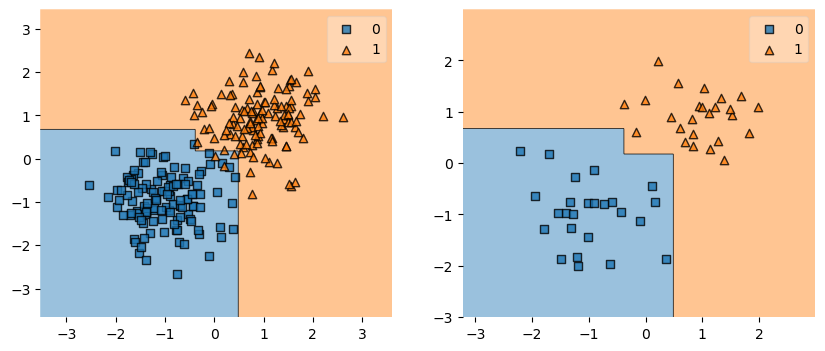

In [25]:
fig, gs = plt.figure(figsize=(10,4)), gridspec.GridSpec(1,2)
ax = []
ax.append(fig.add_subplot(gs[0]))
ax.append(fig.add_subplot(gs[1]))
plot_decision_regions(x_train,y_train,model,ax=ax[0])
plot_decision_regions(x_test,y_test,model,ax=ax[1])

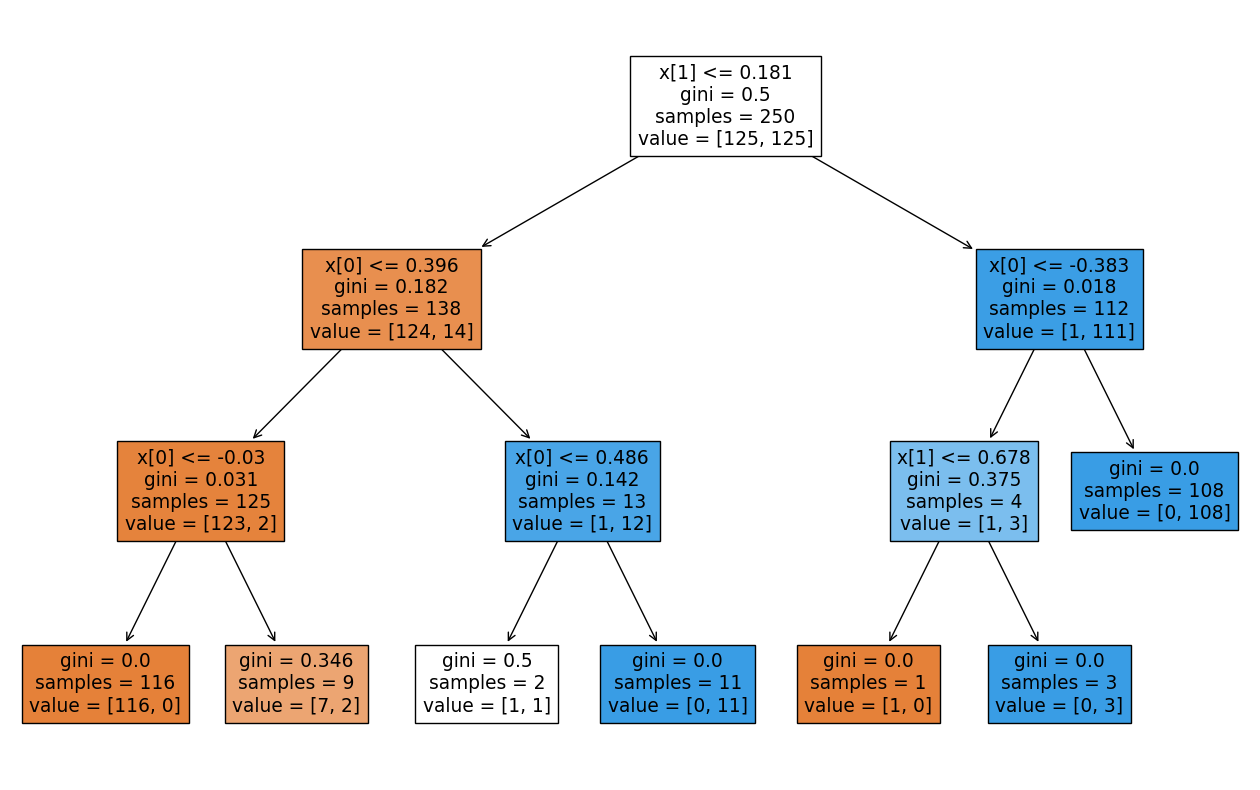

In [26]:
fig = plt.figure(figsize=(16,10))
_ = tree.plot_tree(model,filled=True)

In [33]:
data = load_wine()
x = data['data']
y = data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.2,
                                                random_state=0)

In [34]:
model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(x_train,y_train)
print(model.score(x_train,y_train),model.score(x_test,y_test))
print(classification_report(y_test,model.predict(x_test)))

0.9929577464788732 0.9722222222222222
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



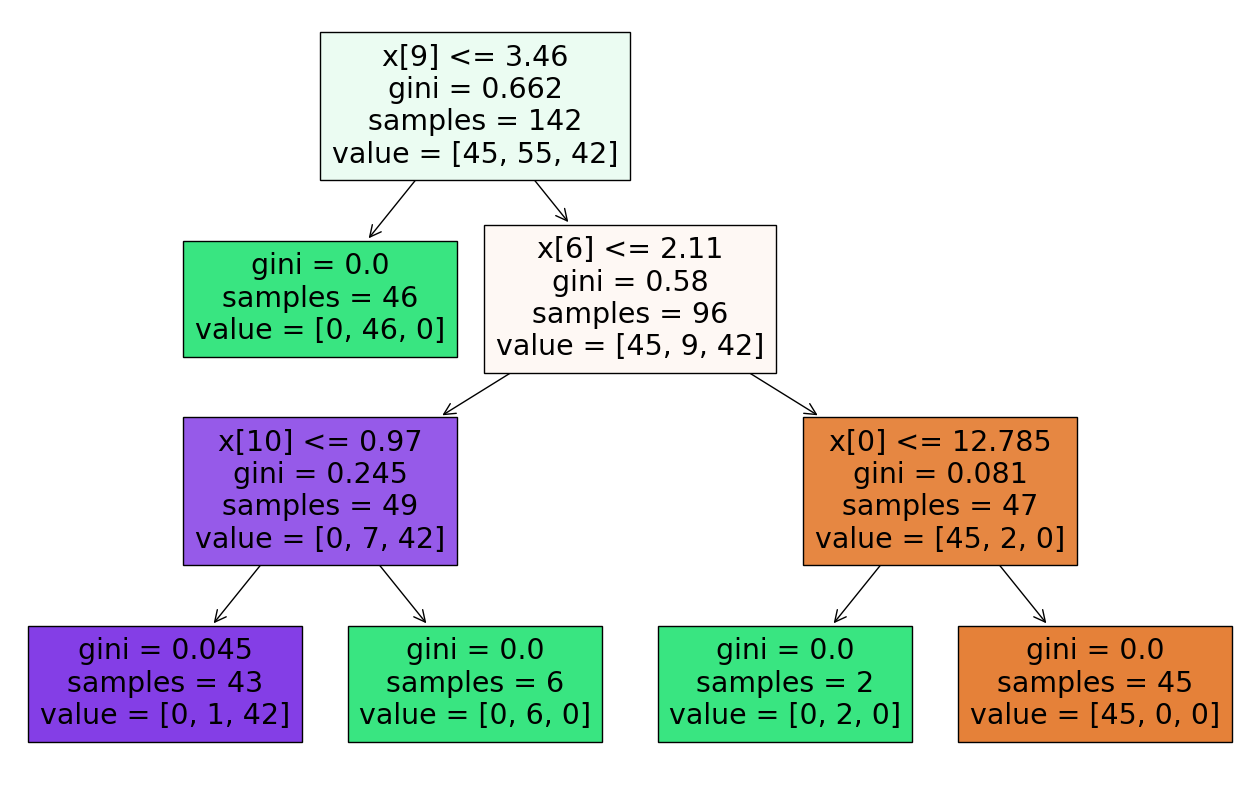

In [35]:
fig = plt.figure(figsize=(16,10))
_ = tree.plot_tree(model,filled=True)

In [37]:
np.random.seed(0)
l = 200
beta = 1.

x = np.linspace(-10,10,l).reshape([-1,1])
w = np.array([1.,1.,4.,])
y = w[0]+w[1]*x[:,0]+w[2]*np.sin(x[:,0])+beta*np.random.randn(l)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.2,
                                                random_state=0)

In [38]:
model = DecisionTreeRegressor(max_depth=3,random_state=0)
model.fit(x_train,y_train)
print(model.score(x_train,y_train),model.score(x_test,y_test))

0.9441883100903042 0.9447211631066906


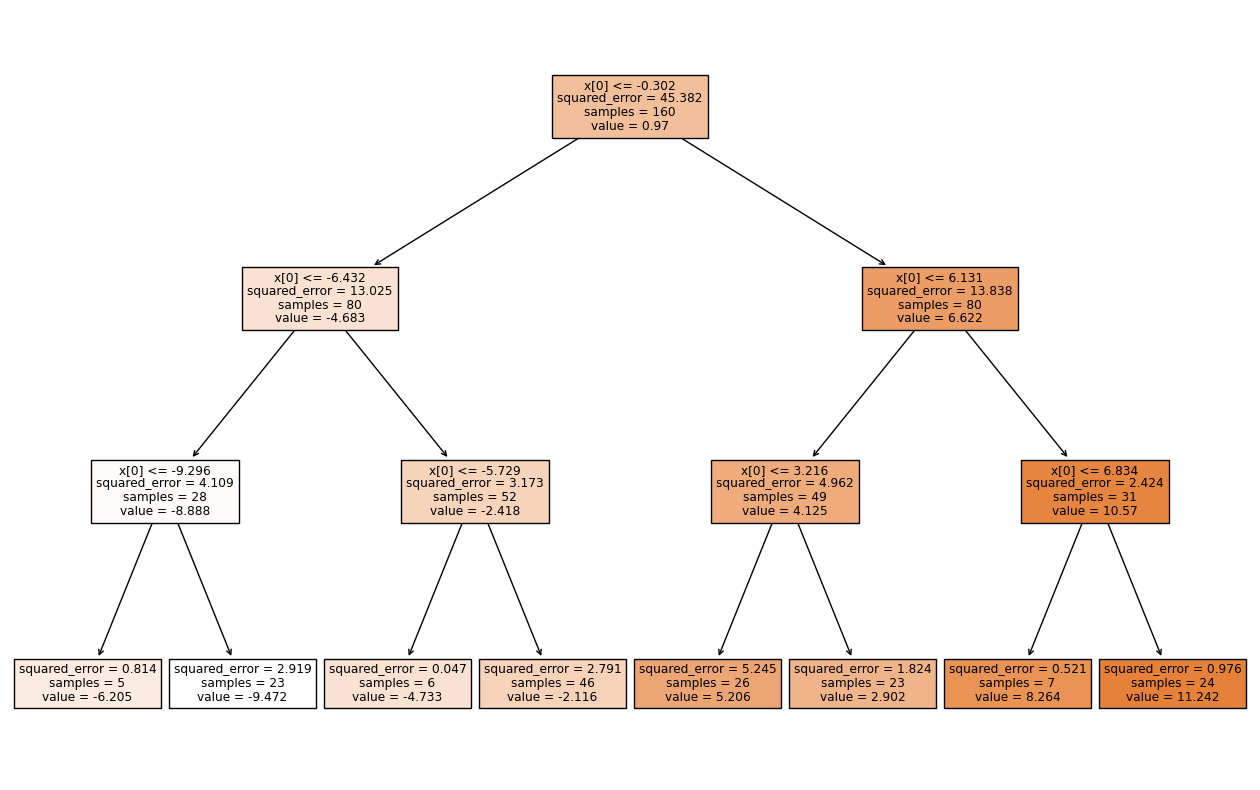

In [39]:
fig = plt.figure(figsize=(16,10))
_ = tree.plot_tree(model,filled=True)

In [41]:
models = []
for i in [3,5,9]:
    model = DecisionTreeRegressor(max_depth=i,random_state=0)
    model.fit(x_train,y_train)
    models.append(model)

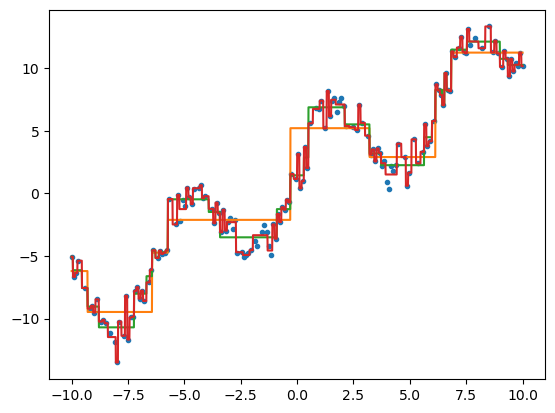

In [44]:
plt.plot(x_train[:,0],y_train,'.')
x = np.linspace(-10,10,2000)
for model in models:
    plt.plot(x,model.predict(x.reshape(-1,1)))

In [45]:
data = load_wine()
x = data['data']
y = data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.2,
                                                random_state=0)

In [52]:
model = RandomForestClassifier(n_estimators=6,max_depth=3,max_features=3,random_state=0)
model.fit(x_train,y_train)
print(model.score(x_train,y_train),model.score(x_test,y_test))
print(classification_report(y_test,model.predict(x_test)))

0.9788732394366197 0.9722222222222222
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

